# 0. Setup Paths

In [50]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet_tuned'
# we choice this pretrained model because it's pretty fast
# but we could have choice a pretrained model which is slower but which gives better results.
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtx'

In [51]:
paths = {
    'WORKSPACE_PATH': os.path.join('Nicholas_Renotte_Course', 'Workspace'),
    'SCRIPTS_PATH': os.path.join('Nicholas_Renotte_Course','Scripts'),
    'APIMODEL_PATH': os.path.join('Nicholas_Renotte_Course','Models'),
    'ANNOTATION_PATH': os.path.join('Nicholas_Renotte_Course', 'Workspace','Annotations'),
    'IMAGE_PATH': os.path.join('Nicholas_Renotte_Course', 'Workspace','Images'),
    'MODEL_PATH': os.path.join('Nicholas_Renotte_Course', 'Workspace','Models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Nicholas_Renotte_Course', 'Workspace','Pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Nicholas_Renotte_Course', 'Workspace','Models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Nicholas_Renotte_Course', 'Workspace','Models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Nicholas_Renotte_Course', 'Workspace','Models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Nicholas_Renotte_Course', 'Workspace','Models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Nicholas_Renotte_Course','protoc')
 }


In [52]:
files = {
    'PIPELINE_CONFIG':os.path.join('Nicholas_Renotte_Course', 'Workspace','Models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [22]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

In [23]:
cd ..

/home/uruk380/UTC_UBUNTU/My_Own_Project


# 1. DOWNload TF Models Pretrained Models from Tensorflow Model Zoo and Install TFOD

In [11]:
# https://www.tensorflow.org/install/source_windows

In [12]:
if os.name=='nt':
    !pip install wget
    import wget

https://github.com/tensorflow/models
https://github.com/tensorflow/models/tree/master/research/object_detection

in our project we only need Tensorflow object detection API

In [ ]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_Detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

In [33]:
!echo $CONDA_DEFAULT_ENV

Tensorflow_Object_Detection_env


In [34]:
!echo $CONDA_DEFAULT_ENV

Tensorflow_Object_Detection_env


In [12]:
# Install Tensorflow Object Detection 
if os.name=='posix':  
    !sudo apt-get install protobuf-compiler
    !cd Nicholas_Renotte_Course/Models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 
    
if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    wget.download(url)
    !move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip install -e .



[sudo] Mot de passe de uruk380 : 
/bin/bash: protoc : commande introuvable


In [115]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

ficientnet with params ModelConfig(width_coefficient=1.2, depth_coefficient=1.4, resolution=300, dropout_rate=0.3, blocks=(BlockConfig(input_filters=32, output_filters=16, kernel_size=3, num_repeat=1, expand_ratio=1, strides=(1, 1), se_ratio=0.25, id_skip=True, fused_conv=False, conv_type='depthwise'), BlockConfig(input_filters=16, output_filters=24, kernel_size=3, num_repeat=2, expand_ratio=6, strides=(2, 2), se_ratio=0.25, id_skip=True, fused_conv=False, conv_type='depthwise'), BlockConfig(input_filters=24, output_filters=40, kernel_size=5, num_repeat=2, expand_ratio=6, strides=(2, 2), se_ratio=0.25, id_skip=True, fused_conv=False, conv_type='depthwise'), BlockConfig(input_filters=40, output_filters=80, kernel_size=3, num_repeat=3, expand_ratio=6, strides=(2, 2), se_ratio=0.25, id_skip=True, fused_conv=False, conv_type='depthwise'), BlockConfig(input_filters=80, output_filters=112, kernel_size=5, num_repeat=3, expand_ratio=6, strides=(1, 1), se_ratio=0.25, id_skip=True, fused_conv=Fa

In [14]:
!pip install tensorflow --upgrade

In [15]:
!pip uninstall protobuf matplotlib -y
!pip install protobuf matplotlib==3.2

Found existing installation: protobuf 3.17.1
Uninstalling protobuf-3.17.1:
  Successfully uninstalled protobuf-3.17.1
Found existing installation: matplotlib 3.4.2
Uninstalling matplotlib-3.4.2:
  Successfully uninstalled matplotlib-3.4.2
     |████████████████████████████████| 1.0 MB 1.2 MB/s 
     |████████████████████████████████| 12.4 MB 1.4 MB/s 


In [53]:
import object_detection

In [17]:
if os.name =='posix':
    !wget {PRETRAINED_MODEL_URL}
    !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}
if os.name == 'nt':
    wget.download(PRETRAINED_MODEL_URL)
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}



--2021-07-20 09:57:41--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
Résolution de download.tensorflow.org (download.tensorflow.org)… 2a00:1450:4007:810::2010, 216.58.214.80
Connexion à download.tensorflow.org (download.tensorflow.org)|2a00:1450:4007:810::2010|:80… connecté.
requête HTTP transmise, en attente de la réponse… 200 OK
Taille : 20515344 (20M) [application/x-tar]
Enregistre : «ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz»

ssd_mobilenet_v2_fp 100%[===================>]  19,56M  1,39MB/s    ds 14s     

2021-07-20 09:57:55 (1,45 MB/s) - «ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz» enregistré [20515344/20515344]

ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
ssd_mobilenet_v2_f

# 2. Create Label Map

In [54]:
# becareful we have to use the same label as used in the label software
labels = [{'name':'thumbUp','id':1},{'name':'thumbsDown', 'id':2},{'name':'thankYou','id':3},{'name':'goodLuck','id':4}]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

In [31]:
cd My_Own_Project/Tensorflow_Object_Detection/


[Errno 2] No such file or directory: 'My_Own_Project/Tensorflow_Object_Detection/'
/home/uruk380/UTC_UBUNTU/My_Own_Project/Tensorflow_Object_Detection


# 3.TFRecords

- TFRecords are a binary file format for storing data.
- Using a TFRecord helps speed up training for your custom object detection model
- It converts our annotations and images into file format that we can use

In [21]:
# OPTIONAL IF RUNNING ON COLAB
ARCHIVE_FILES = os.path.join(paths['IMAGE_PATH'], 'archive.tar.gz')
if os.path.exists(ARCHIVE_FILES):
  !tar -zxvf {ARCHIVE_FILES}



In [15]:
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}



Clonage dans 'Nicholas_Renotte_Course/Scripts'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 1 (delta 0), pack-reused 0
Dépaquetage des objets: 100% (3/3), 2.67 Kio | 2.67 Mio/s, fait.


### *if we have use wrong label there will be an error in the below cell*

In [55]:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'Train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'Test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')}

Successfully created the TFRecord file: Nicholas_Renotte_Course/Workspace/Annotations/train.record
Successfully created the TFRecord file: Nicholas_Renotte_Course/Workspace/Annotations/test.record


Good to know:
- pipeline.config is what controls what your model looks like. It defines the architecture of the model
- it does our data augmentation for us. In other models the data augmentation architecture is different.
- below that we have path that we have to configure !
    - fine_tune_checkpoint
    - label_map_path (train_input_reader)
    - input_path (train_input_reader)
    - label_map_path (eval_input_reader)
    - input_path (eval_input_reader)
- label map path is our labelmap.pbtext
- input path is our train.record (train_input_reader)
- input path is our test.record (eval_input_reader)

# 4. Copy Model Config to Training Folder

In [33]:
if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

# 5. Update Config For Transfer Learning

In [56]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [42]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [43]:
config

{'model': ssd {
   num_classes: 4
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.996999979019165
         scale: true
         epsilon: 0.0010000000474974513
       }
     }
     use_depthwise: true
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   match

In [37]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:
    proto_str = f.read()
    text_format.Merge(proto_str, pipeline_config)

In [38]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]



In [39]:
config_text = text_format.MessageToString(pipeline_config)  
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:
    f.write(config_text)

In [40]:
config_text

'model {\n  ssd {\n    num_classes: 4\n    image_resizer {\n      fixed_shape_resizer {\n        height: 320\n        width: 320\n      }\n    }\n    feature_extractor {\n      type: "ssd_mobilenet_v2_fpn_keras"\n      depth_multiplier: 1.0\n      min_depth: 16\n      conv_hyperparams {\n        regularizer {\n          l2_regularizer {\n            weight: 4e-05\n          }\n        }\n        initializer {\n          random_normal_initializer {\n            mean: 0.0\n            stddev: 0.01\n          }\n        }\n        activation: RELU_6\n        batch_norm {\n          decay: 0.997\n          scale: true\n          epsilon: 0.001\n        }\n      }\n      use_depthwise: true\n      override_base_feature_extractor_hyperparams: true\n      fpn {\n        min_level: 3\n        max_level: 7\n        additional_layer_depth: 128\n      }\n    }\n    box_coder {\n      faster_rcnn_box_coder {\n        y_scale: 10.0\n        x_scale: 10.0\n        height_scale: 5.0\n        width_sc

# 6. Train the model

In [44]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [47]:
command = "python3 {} --model_dir={} --pipeline_config_path={} --num_train_steps=3000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

good to start with num_train_steps = 2000

In [48]:
print(command)
# write this command into a terminal

python3 Nicholas_Renotte_Course/Models/research/object_detection/model_main_tf2.py --model_dir=Nicholas_Renotte_Course/Workspace/Models/my_ssd_mobnet_tuned --pipeline_config_path=Nicholas_Renotte_Course/Workspace/Models/my_ssd_mobnet_tuned/pipeline.config --num_train_steps=3000


python Nicholas_Renotte_Course/Models/research/object_detection/model_main_tf2.py --model_dir=Nicholas_Renotte_Course/Workspace/Models/my_ssd_mobnet --pipeline_config_path=Nicholas_Renotte_Course/Workspace/Models/my_ssd_mobnet/pipeline.config --num_train_steps=500

# 7. Evaluate the Model

In [133]:
command = "python3 {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [134]:
print(command)

python3 Nicholas_Renotte_Course/Models/research/object_detection/model_main_tf2.py --model_dir=Nicholas_Renotte_Course/Workspace/Models/my_ssd_mobnet --pipeline_config_path=Nicholas_Renotte_Course/Workspace/Models/my_ssd_mobnet/pipeline.config --checkpoint_dir=Nicholas_Renotte_Course/Workspace/Models/my_ssd_mobnet


# 8. Load Train Model From Checkpoint

In [57]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util


becareful we have to change ckpt-x !

In [58]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-4')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

2021-07-21 14:36:37.336327: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-07-21 14:36:37.336355: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-07-21 14:36:37.336379: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (uruk380-Lenovo-Yoga-C940-14IIL): /proc/driver/nvidia/version does not exist
2021-07-21 14:36:37.336602: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# 9. Detect from an Image

In [59]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline


In [60]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [26]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'Test', 'thumbsup.e8e6b780-e89a-11eb-8712-bd618ab3d1ce.jpg')

In [54]:
tf.config.run_functions_eagerly(True)

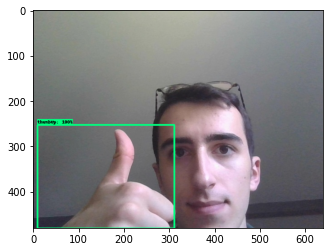

In [31]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.8,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

In [61]:
cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while cap.isOpened(): 
    ret, frame = cap.read()
    image_np = np.array(frame)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.8,
                agnostic_mode=False)

    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break


2021-07-21 14:37:12.408849: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-07-21 14:37:12.451433: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 1497600000 Hz
QObject::moveToThread: Current thread (0x55b6fbafba60) is not the object's thread (0x55b6fb174a20).
Cannot move to target thread (0x55b6fbafba60)

QObject::moveToThread: Current thread (0x55b6fbafba60) is not the object's thread (0x55b6fb174a20).
Cannot move to target thread (0x55b6fbafba60)

QObject::moveToThread: Current thread (0x55b6fbafba60) is not the object's thread (0x55b6fb174a20).
Cannot move to target thread (0x55b6fbafba60)

QObject::moveToThread: Current thread (0x55b6fbafba60) is not the object's thread (0x55b6fb174a20).
Cannot move to target thread (0x55b6fbafba60)

QObject::moveToThread: Current thread (0x55b6fbafba60) is not the object's thread (0x55b6fb174a20).
Cannot move to target thread (0x55b6fbaf

In [44]:
!pip uninstall opencv-python-headless -y

In [45]:
pip install opencv-python --upgrade

Note: you may need to restart the kernel to use updated packages.


In [1]:
conda install pyqt

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


# 10. Freezing the Graph

In [55]:
FREEZE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'exporter_main_v2.py ')

In [56]:
command = "python3 {} --input_type=image_tensor --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(FREEZE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['OUTPUT_PATH'])

In [57]:
print(command)

python3 Nicholas_Renotte_Course/Models/research/object_detection/exporter_main_v2.py  --input_type=image_tensor --pipeline_config_path=Nicholas_Renotte_Course/Workspace/Models/my_ssd_mobnet/pipeline.config --trained_checkpoint_dir=Nicholas_Renotte_Course/Workspace/Models/my_ssd_mobnet --output_directory=Nicholas_Renotte_Course/Workspace/Models/my_ssd_mobnet/export


In [37]:
!(command)

# 11. Conversion to TFJS

We can alose use our model inside of web applications.
By saving our model in TFJS format we can buikd web applications with them.

In [58]:
!pip install tensorflowjs

     |████████████████████████████████| 64 kB 454 kB/s 


In [59]:
command = "tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default {} {}".format(os.path.join(paths['OUTPUT_PATH'], 'saved_model'), paths['TFJS_PATH'])

In [62]:
print(command)

tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default Nicholas_Renotte_Course/Workspace/Models/my_ssd_mobnet/export/saved_model Nicholas_Renotte_Course/Workspace/Models/my_ssd_mobnet/tfjsexport


In [63]:
!{command}

2021-07-20 21:49:45.721979: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-07-20 21:49:45.722004: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2021-07-20 21:49:47.625448: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-07-20 21:49:47.625474: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-07-20 21:49:47.625490: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (uruk380-Lenovo-Yoga-C940-14IIL): /proc/driver/nvidia/version does not exist
2021-07-20 21:49:47.625648: I tensorflow/core/

# 12. Convertion to TFLite

TFLite is another file format that is typically used for mobile applications or machines that can't or won't be running a full version of Tensorflow Object detection.
Useful for Raspberry Pi projects

In [74]:
TFLITE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'export_tflite_graph_tf2.py ')

In [75]:
command = "python3 {} --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(TFLITE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['TFLITE_PATH'])

In [67]:
print(command)

python3 Nicholas_Renotte_Course/Models/research/object_detection/export_tflite_graph_tf2.py  --pipeline_config_path=Nicholas_Renotte_Course/Workspace/Models/my_ssd_mobnet/pipeline.config --trained_checkpoint_dir=Nicholas_Renotte_Course/Workspace/Models/my_ssd_mobnet --output_directory=Nicholas_Renotte_Course/Workspace/Models/my_ssd_mobnet/tfliteexport


In [ ]:
!{command}

In [76]:
FROZEN_TFLITE_PATH = os.path.join(paths['TFLITE_PATH'], 'saved_model')
TFLITE_MODEL = os.path.join(paths['TFLITE_PATH'], 'saved_model', 'detect.tflite')


In [77]:
command = "tflite_convert \
--saved_model_dir={} \
--output_file={} \
--input_shapes=1,300,300,3 \
--input_arrays=normalized_input_image_tensor \
--output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' \
--inference_type=FLOAT \
--allow_custom_ops".format(FROZEN_TFLITE_PATH, TFLITE_MODEL, )

In [78]:
print(command)

tflite_convert --saved_model_dir=Nicholas_Renotte_Course/Workspace/Models/my_ssd_mobnet/tfliteexport/saved_model --output_file=Nicholas_Renotte_Course/Workspace/Models/my_ssd_mobnet/tfliteexport/saved_model/detect.tflite --input_shapes=1,300,300,3 --input_arrays=normalized_input_image_tensor --output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' --inference_type=FLOAT --allow_custom_ops


In [ ]:
!{command}

I have this error when I run the previous command :( :
AttributeError: 'google.protobuf.pyext._message.RepeatedCompositeCo' object has no attribute 'append'

# 13. Zip and Export Models

In [79]:
!tar -czf models.tar.gz {paths['CHECKPOINT_PATH']}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Performance tuning to improve Precision and recall

Techniques
There are couple of things we can try in order to boost model performance.
- Adding more images of low performing classes to our training set
- Training for longer
- Changing architecture